## **Loading intially required Libraries**

In [1]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d puneet6060/intel-image-classification
# ! unzip intel-image-classification.zip

In [3]:
# Importing starter libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
import warnings
warnings.filterwarnings('ignore')

## **Part 1 : CNN (Convolutional Neural Network)**

### **Data Preprocessing**

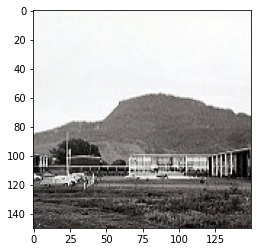

In [3]:
# Check Image Sample

img = image.load_img('/content/seg_train/seg_train/buildings/0.jpg')

plt.imshow(img)

In [4]:
# Check Image shape

cv2.imread('/content/seg_train/seg_train/buildings/0.jpg').shape

(150, 150, 3)

In [5]:
# Generate Data from images for train data

train_gen = ImageDataGenerator(rescale = 1./255)

train_data = train_gen.flow_from_directory('/content/seg_train/seg_train',
                                            target_size=(64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=True)

Found 14034 images belonging to 6 classes.


In [6]:
# Generate Data from images for test data

test_gen = ImageDataGenerator(rescale = 1./255)

test_data = test_gen.flow_from_directory('/content/seg_test/seg_test',
                                          target_size=(64,64),
                                          batch_size = 1,
                                          shuffle=False)

Found 3000 images belonging to 6 classes.


In [7]:
# Checking Classes for Train Data 

train_data.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [8]:
# Checking Classes for Test Data 

test_data.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

### **Model Training**

In [9]:
# Model

model = keras.models.Sequential([
    keras.layers.Conv2D(200,3, padding = "same", activation = "relu" ,input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D(5,5),
    
    keras.layers.Conv2D(150,3, padding = "same",activation = "relu"),
    
    keras.layers.Conv2D(120,3, padding = "same", activation = "relu"),
    keras.layers.Dropout(rate=0.5),
   
    keras.layers.Conv2D(80,3, padding = "same",activation = "relu"),
    
    keras.layers.Conv2D(50,3, padding = "same", activation = "relu"),
    keras.layers.MaxPooling2D(5,5),
  
   
    
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation = "relu"),
    keras.layers.Dense(100,activation = "relu"),
    keras.layers.Dense(50,activation = "relu"),
   
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(6, activation='softmax')
])

In [10]:
# Check Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 200)       5600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 150)       270150    
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 120)       162120    
                                                                 
 dropout (Dropout)           (None, 12, 12, 120)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 80)        86480     
                                                        

In [11]:
# Compiling the Model

opt = tf.keras.optimizers.Adam(0.0001)

model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')

In [12]:
# Training

history = model.fit(train_data, validation_data = test_data, epochs = 25, verbose = 1, batch_size = 32)

Epoch 1/25
439/439 [==============================] - 48s 103ms/step - loss: 1.4422 - accuracy: 0.3777 - val_loss: 1.2233 - val_accuracy: 0.4997
Epoch 2/25
439/439 [==============================] - 32s 72ms/step - loss: 1.2099 - accuracy: 0.4975 - val_loss: 1.0701 - val_accuracy: 0.5767
Epoch 3/25
439/439 [==============================] - 33s 75ms/step - loss: 1.0867 - accuracy: 0.5704 - val_loss: 0.9784 - val_accuracy: 0.6307
Epoch 4/25
439/439 [==============================] - 33s 74ms/step - loss: 0.9889 - accuracy: 0.6183 - val_loss: 0.8767 - val_accuracy: 0.6717
Epoch 5/25
439/439 [==============================] - 33s 74ms/step - loss: 0.9230 - accuracy: 0.6586 - val_loss: 0.8088 - val_accuracy: 0.6970
Epoch 6/25
439/439 [==============================] - 31s 70ms/step - loss: 0.8639 - accuracy: 0.6848 - val_loss: 0.7216 - val_accuracy: 0.7400
Epoch 7/25
439/439 [==============================] - 32s 74ms/step - loss: 0.8036 - accuracy: 0.7161 - val_loss: 0.6717 - val_accuracy

### **Model Evaluation**

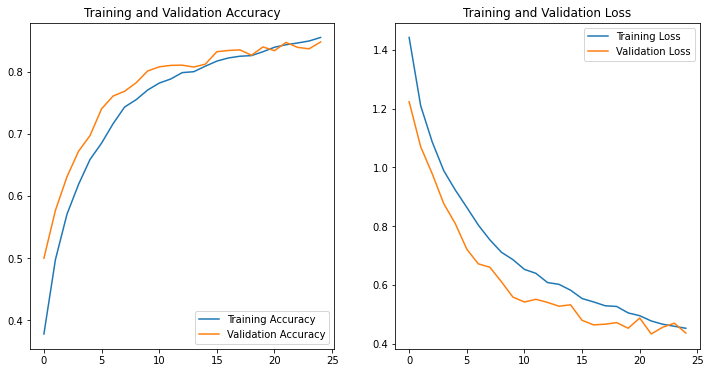

In [14]:
# Plotting the results

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(range(25), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(25), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(25), history.history['loss'], label='Training Loss')
plt.plot(range(25), history.history['val_loss'], label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [15]:
# Storing Predictions

pred = model.predict(test_data).argmax(axis=1)  #argmax takes the max probaility 
pred

array([0, 0, 0, ..., 3, 0, 5])

In [16]:
# Checking for results

img = cv2.imread('/content/seg_test/seg_test/forest/23407.jpg')
img = cv2.resize(img,(64,64))
img = img/255.0
img = img.reshape(-1,64,64,3)

np.round(model.predict(img)).argmax(axis=1)

array([5])

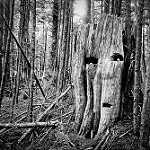

In [17]:
# Checking the same image

load_img('/content/seg_test/seg_test/forest/23407.jpg')

In [18]:
pred = model.predict(test_data)

In [19]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predicted_classes=np.argmax(pred,axis=1)

In [20]:
true_classes=test_data.classes
class_labels=list(test_data.class_indices.keys())

In [21]:
from sklearn.metrics import classification_report,plot_confusion_matrix
report=classification_report(true_classes,predicted_classes,target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   buildings       0.82      0.84      0.83       437
      forest       0.97      0.96      0.97       474
     glacier       0.89      0.67      0.76       553
    mountain       0.77      0.85      0.81       525
         sea       0.81      0.89      0.85       510
      street       0.86      0.89      0.88       501

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



In [22]:
# Confusion Matrix

corrmat = confusion_matrix(predicted_classes, true_classes)

corrmat

array([[369,   4,   8,   7,  18,  44],
       [  6, 456,   3,   3,   2,   1],
       [  1,   0, 371,  31,  15,   0],
       [  5,   3, 103, 448,  21,   3],
       [  9,   0,  58,  34, 453,   7],
       [ 47,  11,  10,   2,   1, 446]])

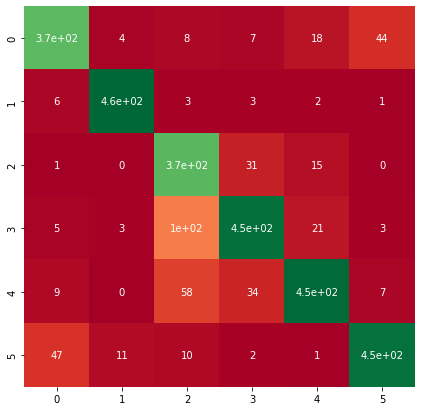

In [23]:
# Confusion Matrix Heatmap

import seaborn as sns

plt.figure(figsize=(7, 7))

sns.heatmap(corrmat, annot = True, cmap = 'RdYlGn', cbar = False)

## **Part 2 : AlexNet**

### **Data Preprocessing**

In [24]:
# Setting Parameters for AlexNet

train_path = '/content/seg_train/seg_train'

train_alex = train_gen.flow_from_directory(train_path,
                                           target_size=(227,227),
                                           batch_size = 32,
                                           class_mode = 'categorical',
                                           shuffle=True)

test_path = '/content/seg_test/seg_test'

test_alex = test_gen.flow_from_directory(test_path,
                                         target_size=(227,227),
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         shuffle=True)

pred_path = '/content/seg_pred'

pred_alex = test_gen.flow_from_directory(pred_path,
                                         target_size=(227,227),
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         shuffle=True)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


### **AlexNet Architecture**

In [25]:
# Defining AlexNet Architecture

from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model

def AlexNet(input_shape):
    
  X_input = Input(input_shape)
  
  X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
  X = BatchNormalization(axis = 3 , name = "bn0")(X)
  X = Activation('relu')(X)
  
  X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
  
  X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
  X = BatchNormalization(axis = 3 ,name='bn1')(X)
  X = Activation('relu')(X)
  
  X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
  
  X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
  X = BatchNormalization(axis = 3, name = 'bn2')(X)
  X = Activation('relu')(X)
  
  X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
  X = BatchNormalization(axis = 3, name = 'bn3')(X)
  X = Activation('relu')(X)
  
  X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
  X = BatchNormalization(axis = 3, name = 'bn4')(X)
  X = Activation('relu')(X)
  
  X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
  
  X = Flatten()(X)
  
  X = Dense(4096, activation = 'relu', name = "fc0")(X)
  
  X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
  
  X = Dense(6,activation='softmax',name = 'fc2')(X)
  
  model = Model(inputs = X_input, outputs = X, name='AlexNet')

  return model


### **Modelling with AlexNet**

In [26]:
# Model

alex = AlexNet(train_alex[0][0].shape[1:])

In [27]:
train_data[0][0].shape[1:]

(64, 64, 3)

In [28]:
# Check AlexNet Model Summary

alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [29]:
# Compile the Model

alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [30]:
# Train the Model

alex.fit_generator(train_alex, epochs = 25)

Epoch 1/25
439/439 [==============================] - 47s 103ms/step - loss: 2.2013 - accuracy: 0.4912
Epoch 2/25
439/439 [==============================] - 45s 102ms/step - loss: 0.9183 - accuracy: 0.6484
Epoch 3/25
439/439 [==============================] - 45s 102ms/step - loss: 0.7594 - accuracy: 0.7190
Epoch 4/25
439/439 [==============================] - 45s 102ms/step - loss: 0.6506 - accuracy: 0.7641
Epoch 5/25
439/439 [==============================] - 45s 101ms/step - loss: 0.5877 - accuracy: 0.7897
Epoch 6/25
439/439 [==============================] - 45s 102ms/step - loss: 0.5370 - accuracy: 0.8116
Epoch 7/25
439/439 [==============================] - 45s 102ms/step - loss: 0.4977 - accuracy: 0.8246
Epoch 8/25
439/439 [==============================] - 44s 101ms/step - loss: 0.4679 - accuracy: 0.8382
Epoch 9/25
439/439 [==============================] - 45s 103ms/step - loss: 0.4554 - accuracy: 0.8406
Epoch 10/25
439/439 [==============================] - 45s 101ms/step - l

### **Model Evaluation : AlexNet**

In [31]:
# Evaluating the AlexNet Model

alex_prediction = alex.evaluate_generator(test_alex)

print (f"Loss = {str(alex_prediction[0])}")
print (f"Test Accuracy = {str(alex_prediction[1])}")

Loss = 1.1413646936416626
Test Accuracy = 0.6753333210945129


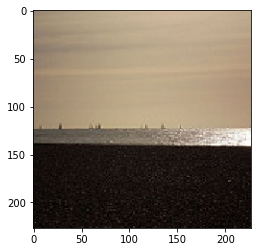

In [32]:
# Checking the Model predictions on the seg_pred data

alex_seg_pred = alex.predict_generator(pred_alex)

# Check result on one image

plt.imshow(pred_alex[220][0][0])

In [33]:
# Get category of predicted output(s)

import os 
def get_category(predicted_output):
    path = train_path
    return os.listdir(path)[np.argmax(predicted_output)]

In [34]:
predicted_label = get_category(alex_seg_pred[200])

print(f"The Predicted Label is : '{predicted_label}'")

The Predicted Label is : 'sea'
